# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## **Please read the instructions carefully before starting the project.**

This is a commented Python Notebook file in which all the instructions and tasks to be performed are mentioned.

* Blanks '_______' are provided in the notebook that need to be filled with an appropriate code to get the correct result

* With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space

* Identify the task to be performed correctly and only then proceed to write the required code

* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code"

* Running incomplete code may throw an error

* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors

* Add the results/observations derived from the analysis in the presentation and submit the same in .pdf format

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 opencv-python==4.8.0.76 -q --user

In [ ]:
 # Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
!pip install tensorflow==2.13.0 scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.7.1 numpy==1.24.3 pandas==1.5.2 opencv-python==4.8.0.76 -q --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.0/285.0 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 74.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 73.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 39.1 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning,

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs

# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer
# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau
import random
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [130]:
# Uncomment and run the below code if you are using google colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [38]:
import os

# List all files in the current directory
files = os.listdir('.')
print(files)

['.config', 'sample_data']


In [39]:
import numpy as np
import pandas as pd
# Load the image file of dataset
# Save images_decreased and labels to Google Drive
# np.save('/content/drive/My Drive/images_decreased.npy',images_decreased)
# np.save('/content/drive/My Drive/labels.npy', labels)
images = np.load('/content/sample_data/images.npy')

# Check the actual shape of the loaded array
print(images.shape)

# Load the labels file of dataset
labels = pd.read_csv('/content/sample_data/Labels.csv') #Complete the code to read the dataset
# Save to Google Drive
#np.save('/content/drive/My Drive/your_data_folder/your_file.npy', images)

# Reload the data in a new session
#images = np.load('/content/drive/My Drive/your_data_folder/your_file.npy')

(4750, 128, 128, 3)


## Data Overview

### Understand the shape of the dataset

In [40]:
print(images.shape)         # Complete the code to check the shape
print(labels.shape)         # Complete the code to check the shape

(4750, 128, 128, 3)
(1342, 1)


## Exploratory Data Analysis

### Plotting random images from each of the class

In [41]:
import matplotlib.pyplot as plt
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

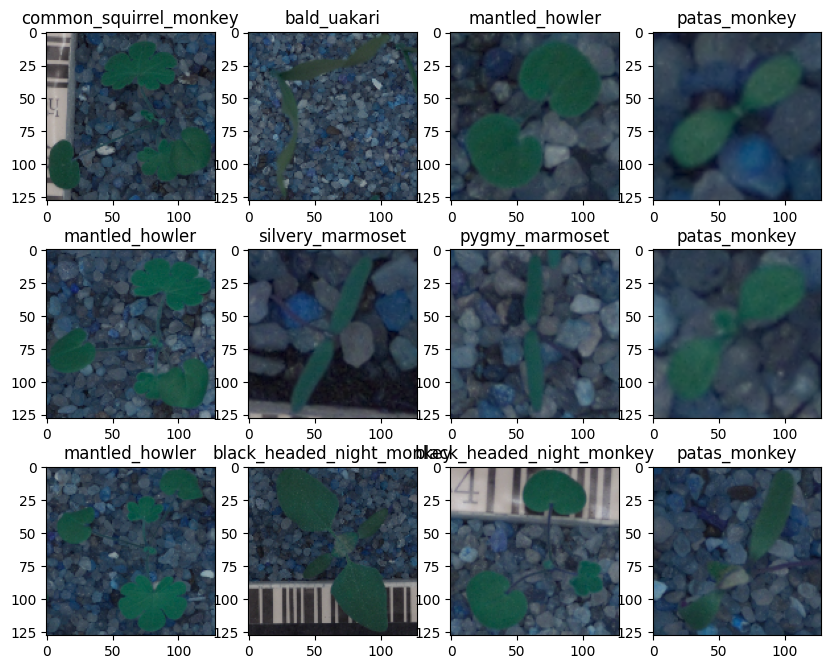

In [42]:
plot_images(images,labels) # Complete the code to input the images and labels to the function and plot the images with their labels

### Checking the distribution of the target variable

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'nilgiri_langur'),
  Text(1, 0, 'mantled_howler'),
  Text(2, 0, 'common_squirrel_monkey'),
  Text(3, 0, 'black_headed_night_monkey'),
  Text(4, 0, 'pygmy_marmoset'),
  Text(5, 0, 'japanese_macaque'),
  Text(6, 0, 'silvery_marmoset'),
  Text(7, 0, 'patas_monkey'),
  Text(8, 0, 'white_headed_capuchin'),
  Text(9, 0, 'bald_uakari')])

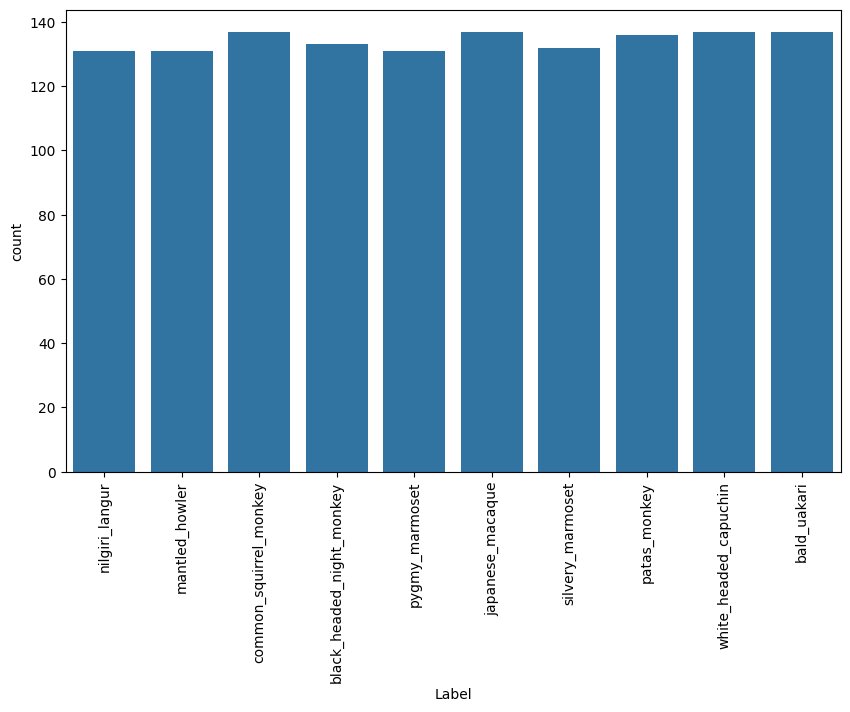

In [43]:
import seaborn as sns
df = pd.DataFrame(labels, columns=['Label'])
plt.figure(figsize=(10, 6))
sns.countplot(x='Label',data=df) #Complete the code to check for data imbalance
plt.xticks(rotation='vertical')


## Data Pre-Processing

### Converting the BGR images to RGB images.

In [44]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
# Images are already loaded as a NumPy array
images = np.load('/content/sample_data/images.npy')
print(images.shape) # To Check the shape of the loaded array
#convert each image from BGR to RGB
rgb_images = []   # Initialize a list to store RGB images
# Convert each image from BGR to RGB
for i in range(len(images)):
    bgr_image = images[i]
    rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
    rgb_images.append(rgb_image)

(4750, 128, 128, 3)


### Resizing images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [45]:
images_decreased=[]
height = 64                    # Complete the code to define the height as 64
width =  64                    # Complete the code to define the width as 64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

**Image before resizing**

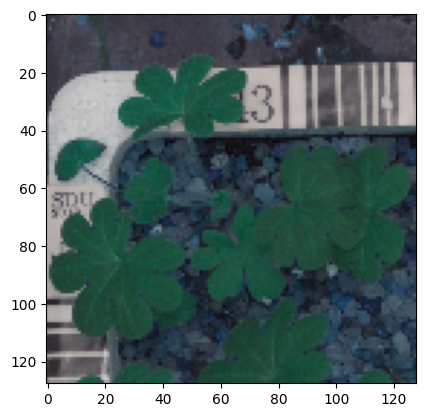

In [46]:
plt.imshow(images[3])

**Image after resizing**

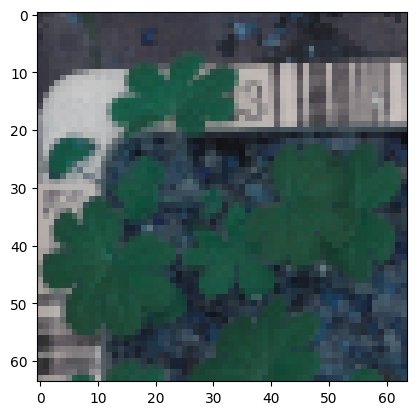

In [47]:
plt.imshow(images_decreased[3])

### Data Preparation for Modeling


- As we have less images in our dataset, we will only use 10% of our data for testing, 10% of our data for validation and 80% of our data for training.
- We are using the train_test_split() function from scikit-learn. Here, we split the dataset into three parts, train,test and validation.

In [48]:
from sklearn.model_selection import train_test_split

# Check lengths
print(f"Length of images_decreased: {len(images_decreased)}")
print(f"Length of labels:{len(labels)}")
labels_array = labels['Label'].to_numpy() # Replace 'label_column' with the actual column name
print(f"Shape of images_decreased: {np.shape(images_decreased)}")
images_decreased = images_decreased[:len(labels_array)]
X_temp, X_test, y_temp, y_test = train_test_split(images_decreased, labels_array, test_size=0.1, random_state=42, stratify=labels_array)  # Complete the code to split the data with test_size as 0.1
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, random_state=42,stratify=y_temp)                     # Complete the code to split the data with test_size as 0.1


Length of images_decreased: 4750
Length of labels:1342
Shape of images_decreased: (4750, 64, 64, 3)


In [49]:
# Convert the lists to NumPy arrays
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)
# Complete the code to check the shape of train, validation and test data
print(X_train.shape,y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape,y_test.shape)


(1086, 64, 64, 3) (1086,)
(121, 64, 64, 3) (121,)
(135, 64, 64, 3) (135,)


### Encoding the target labels

In [50]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()                             # Complete the code to intialize the labelBinarizer
y_train_encoded = enc.fit_transform(y_train)       # Complete the code to fit and transform y_train
y_val_encoded=enc.transform(y_val)                  # Complete the code to transform y_val
y_test_encoded=enc.transform(y_test)                # Complete the code to transform y_test

In [51]:
y_train_encoded.shape,y_val_encoded.shape,y_test_encoded.shape  # Complete the code to check the shape of train, validation and test data

((1086, 10), (121, 10), (135, 10))

### Data Normalization

Since the **image pixel values range from 0-255**, our method of normalization here will be **scaling** - we shall **divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [52]:
# Complete the code to normalize the image pixels of train, test and validation data
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## Model Building

In [53]:
# Import the necessary module
from tensorflow.keras import backend
# Clearing backend
backend.clear_session()

In [54]:
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout # Import necessary layers
from tensorflow.keras.optimizers import Adam # Import Adam optimizer
from tensorflow.keras.callbacks import ReduceLROnPlateau # Import the ReduceLROnPlateau class
# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [55]:
# Intializing a sequential model
model1 = Sequential() # Complete the code to intialize a sequential model

# Assuming you have 10 classes in your classification problem
num_classes = 10

# Complete the code to add the first conv layer with 128 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model1.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Complete the code to add the max pooling to reduce the size of output of first conv layer
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# Complete the code to create two similar convolution and max-pooling layers activation = relu
model1.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

model1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# Complete the code to flatten the output of the conv layer after max pooling to make it ready for creating dense connections
model1.add(Flatten())

# Complete the code to add a fully connected dense layer with 16 neurons
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.3))
# Complete the code to add the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model1.add(Dense(num_classes, activation='softmax'))

# Complete the code to use the Adam Optimizer
opt=Adam()
# Complete the code to Compile the model using suitable metric for loss fucntion
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Complete the code to generate the summary of the model
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 32)          0

<b> Fitting the model on the train data

In [58]:
# Complete the code to fit the model on train and also using the validation data for validation
history_1 = model1.fit(
            X_train_normalized, y_train_encoded,
            epochs=10,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=64,
            verbose=2
)

Epoch 1/10
17/17 - 0s - loss: 0.9068 - accuracy: 0.6630 - val_loss: 1.9759 - val_accuracy: 0.2975 - 315ms/epoch - 19ms/step
Epoch 2/10
17/17 - 0s - loss: 0.8670 - accuracy: 0.6621 - val_loss: 2.0251 - val_accuracy: 0.3223 - 246ms/epoch - 14ms/step
Epoch 3/10
17/17 - 0s - loss: 0.8386 - accuracy: 0.6703 - val_loss: 2.0841 - val_accuracy: 0.3140 - 213ms/epoch - 13ms/step
Epoch 4/10
17/17 - 0s - loss: 0.7651 - accuracy: 0.7274 - val_loss: 2.1145 - val_accuracy: 0.2893 - 203ms/epoch - 12ms/step
Epoch 5/10
17/17 - 0s - loss: 0.6552 - accuracy: 0.7532 - val_loss: 2.2515 - val_accuracy: 0.2810 - 206ms/epoch - 12ms/step
Epoch 6/10
17/17 - 0s - loss: 0.6560 - accuracy: 0.7413 - val_loss: 2.2207 - val_accuracy: 0.3306 - 234ms/epoch - 14ms/step
Epoch 7/10
17/17 - 0s - loss: 0.6253 - accuracy: 0.7587 - val_loss: 2.2650 - val_accuracy: 0.3140 - 213ms/epoch - 13ms/step
Epoch 8/10
17/17 - 0s - loss: 0.5781 - accuracy: 0.7873 - val_loss: 2.3412 - val_accuracy: 0.3058 - 212ms/epoch - 12ms/step
Epoch 9/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Model Evaluation**

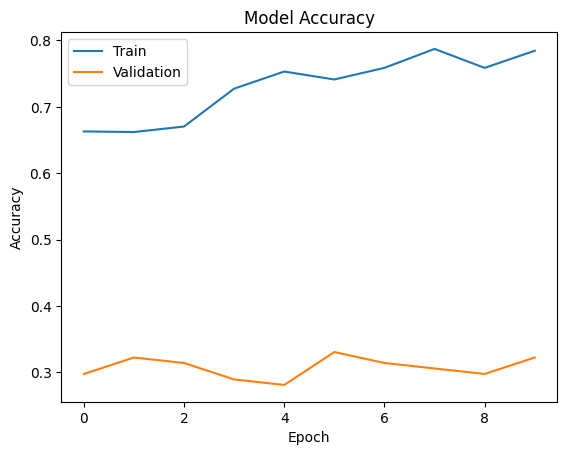

In [59]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Evaluate the model on test data**

In [60]:
accuracy = model1.evaluate(X_test_normalized, y_test_encoded, verbose=2)    # Complete the code to evaluate the model on test data

5/5 - 0s - loss: 2.0327 - accuracy: 0.3407 - 47ms/epoch - 9ms/step


**Plotting the Confusion Matrix**

In [61]:
# Here we would get the output as probablities for each category
y_pred=model1.predict(X_test_normalized) # Complete the code to predict the output probabilities

5/5 [==============================] - 0s 4ms/step


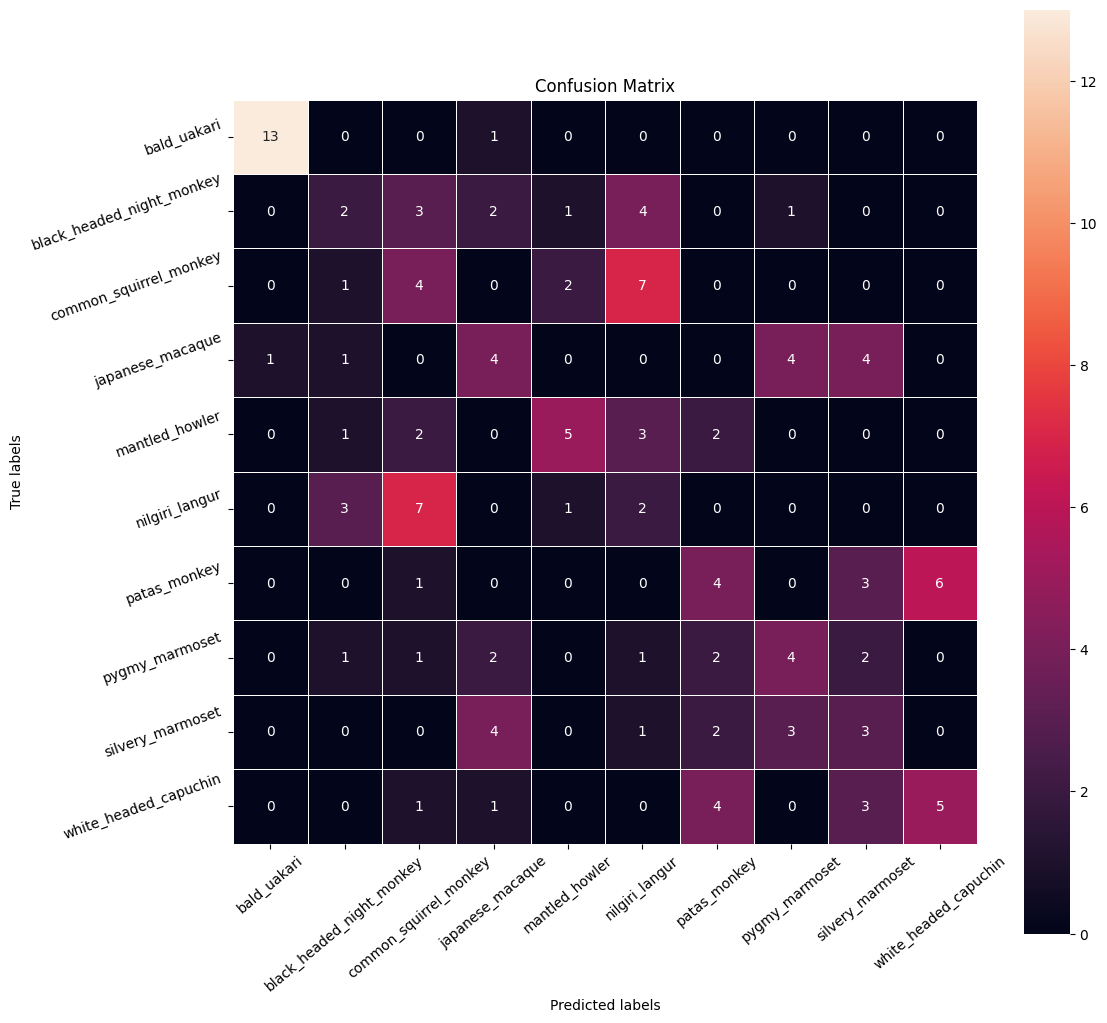

In [62]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg) # Complete the code to plot the confusion matrix
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

**Plotting Classification Report**

In [63]:
from sklearn import metrics
# Plotting the classification report
cr=metrics.classification_report(y_test_arg,y_pred_arg) # Complete the code to plot the classification report
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.22      0.15      0.18        13
           2       0.21      0.29      0.24        14
           3       0.29      0.29      0.29        14
           4       0.56      0.38      0.45        13
           5       0.11      0.15      0.13        13
           6       0.29      0.29      0.29        14
           7       0.33      0.31      0.32        13
           8       0.20      0.23      0.21        13
           9       0.45      0.36      0.40        14

    accuracy                           0.34       135
   macro avg       0.36      0.34      0.34       135
weighted avg       0.36      0.34      0.35       135



## Model Performance Improvement

**Reducing the Learning Rate:**

**ReduceLRonPlateau()** is a function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [64]:
# Code to monitor val_accuracy
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)


### **Data Augmentation**

In [65]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [66]:
# Complete the code to set the rotation_range to 20
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import ImageDataGenerator
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )


In [67]:
# Intializing a sequential model
from tensorflow.keras.layers import BatchNormalization
model2 = Sequential()

# Complete the code to add the first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Complete the code to add max pooling to reduce the size of output of first conv layer
model2.add(MaxPooling2D((2, 2), padding = 'same'))


model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding = 'same'))
model2.add(BatchNormalization())

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model2.add(Dense(16, activation='relu'))

# Complete the code to add dropout with dropout_rate=0.3
model2.add(Dropout(0.25))
# Complete the code to add the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model2.add(Dense(10, activation='softmax'))

# Complete the code to initialize Adam Optimimzer
opt=Adam()
# Complete the code to Compile model
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


<b> Fitting the model on the train data

In [110]:
# Complete the code to fit the model on train data with batch_size=64 and epochs=30
# Epochs
epochs = 30
# Batch size
batch_size = 64

history = model2.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       shuffle=False),
                                epochs=epochs,
                                steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                                validation_data=(X_val_normalized,y_val_encoded),
                                       verbose=1,callbacks=[learning_rate_reduction])


Epoch 1/30
16/16 [==============================] - 3s 164ms/step - loss: 1.1160 - accuracy: 0.5793 - val_loss: 1.7923 - val_accuracy: 0.3058 - lr: 1.0000e-05
Epoch 2/30
16/16 [==============================] - 1s 72ms/step - loss: 1.1242 - accuracy: 0.5695 - val_loss: 1.7941 - val_accuracy: 0.3058 - lr: 1.0000e-05
Epoch 3/30
16/16 [==============================] - 1s 73ms/step - loss: 1.1823 - accuracy: 0.5391 - val_loss: 1.7933 - val_accuracy: 0.3058 - lr: 1.0000e-05
Epoch 4/30
16/16 [==============================] - 1s 72ms/step - loss: 1.1429 - accuracy: 0.5675 - val_loss: 1.7928 - val_accuracy: 0.3058 - lr: 1.0000e-05
Epoch 5/30
16/16 [==============================] - 1s 73ms/step - loss: 1.1444 - accuracy: 0.5656 - val_loss: 1.7926 - val_accuracy: 0.3140 - lr: 1.0000e-05
Epoch 6/30
16/16 [==============================] - 1s 73ms/step - loss: 1.1342 - accuracy: 0.5636 - val_loss: 1.7938 - val_accuracy: 0.3140 - lr: 1.0000e-05
Epoch 7/30
16/16 [==============================] -

**Model Evaluation**

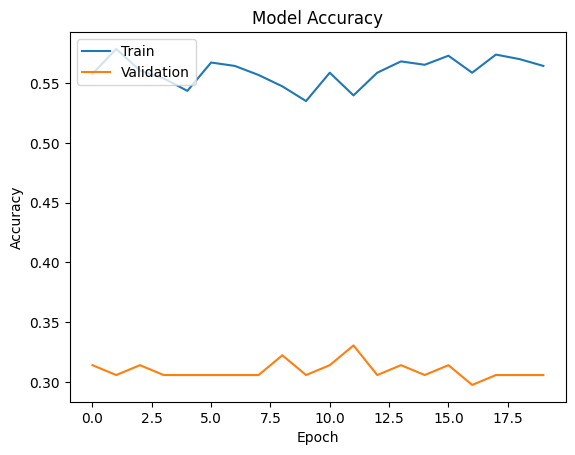

In [104]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


**Evaluate the model on test data**

In [105]:
accuracy = model2.evaluate(X_test, y_test_encoded, verbose=2)  # Complete the code to evaluate the model on test data

5/5 - 0s - loss: 740.3463 - accuracy: 0.1852 - 46ms/epoch - 9ms/step


**Plotting the Confusion Matrix**

In [106]:
# Complete the code to obtain the output probabilities
y_pred=model2.predict(X_test)

5/5 [==============================] - 0s 3ms/step


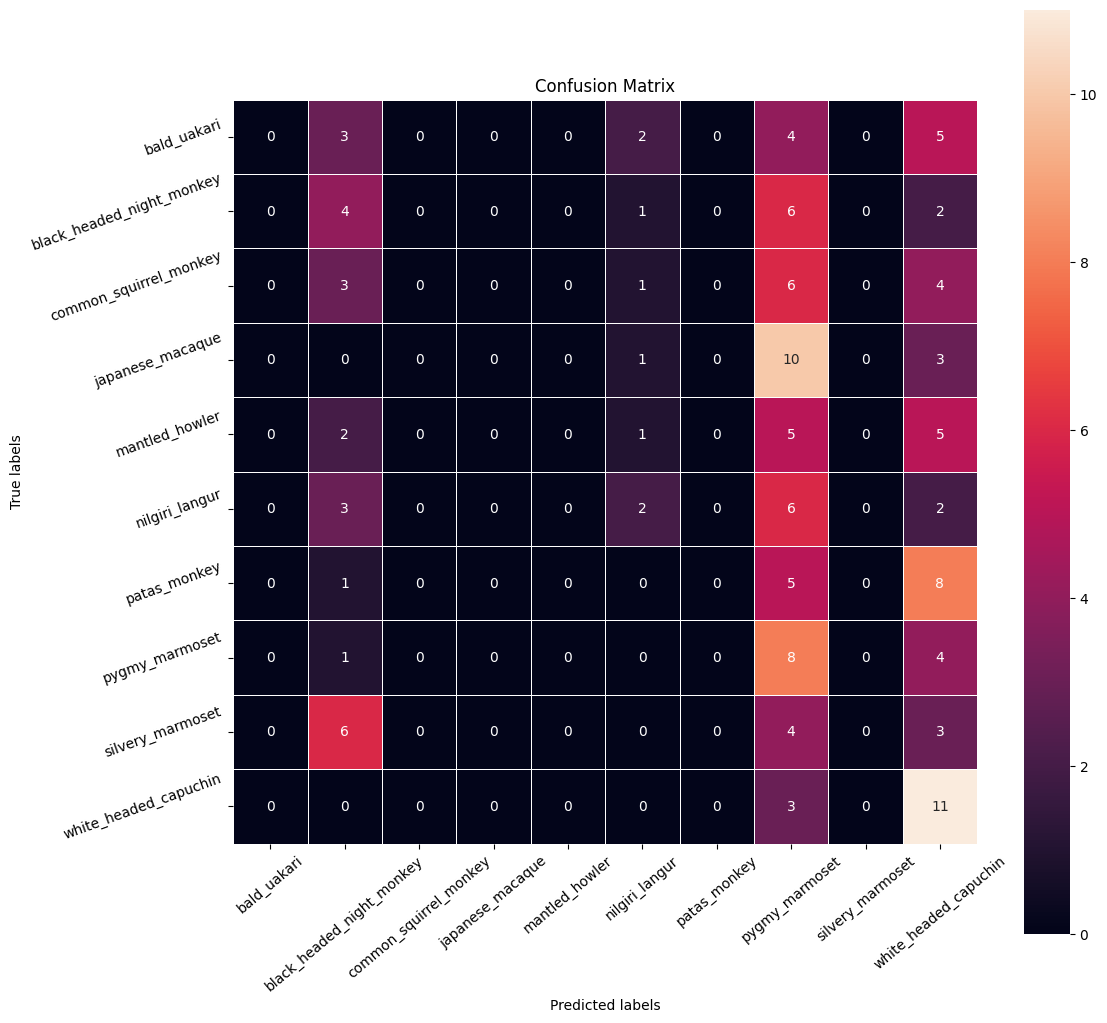

In [107]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)     # Complete the code to obatin the confusion matrix
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

**Plotting Classification Report**

In [108]:
# Plotting the classification report
cr=metrics.classification_report(y_pred_arg,y_test_arg, zero_division=1) # Complete the code to plot the classification report
print(cr)

              precision    recall  f1-score   support

           0       0.00      1.00      0.00         0
           1       0.31      0.17      0.22        23
           2       0.00      1.00      0.00         0
           3       0.00      1.00      0.00         0
           4       0.00      1.00      0.00         0
           5       0.15      0.25      0.19         8
           6       0.00      1.00      0.00         0
           7       0.62      0.14      0.23        57
           8       0.00      1.00      0.00         0
           9       0.79      0.23      0.36        47

    accuracy                           0.19       135
   macro avg       0.19      0.68      0.10       135
weighted avg       0.59      0.19      0.27       135



## Final Model

Comment on the final model you have selected and use the same in the below code to visualize the image.

### Visualizing the prediction

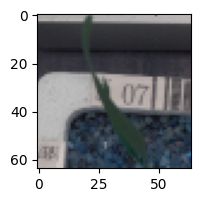

1/1 [==============================] - 0s 26ms/step
Predicted Label ['bald_uakari']
True Label bald_uakari


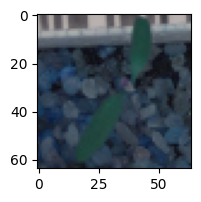

1/1 [==============================] - 0s 28ms/step
Predicted Label ['japanese_macaque']
True Label black_headed_night_monkey


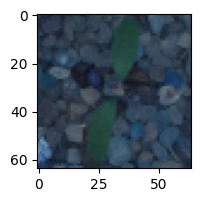

1/1 [==============================] - 0s 25ms/step
Predicted Label ['pygmy_marmoset']
True Label pygmy_marmoset


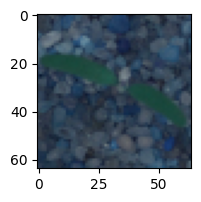

1/1 [==============================] - 0s 27ms/step
Predicted Label ['japanese_macaque']
True Label silvery_marmoset


In [109]:

# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model1.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model1.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[59],)
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model1.predict((X_test_normalized[59].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[59])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model1.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                                  # using inverse_transform() to get the output label from the output vector

## Actionable Insights and Business Recommendations

_____